In [1]:
from keras.utils import plot_model
from keras.applications.resnet50 import ResNet50
import numpy as np
from tensorflow.keras.models import load_model


model_pprint = load_model('LSTM_MODEL_5MIN.keras')
plot_model(model_pprint, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


c:\Users\allen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 297, 297, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 645248)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    82,591,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 248,055,749 (946.26 MB)

 Trainable params: 82,685,249 (315.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 165,370,500 (630.84 MB)

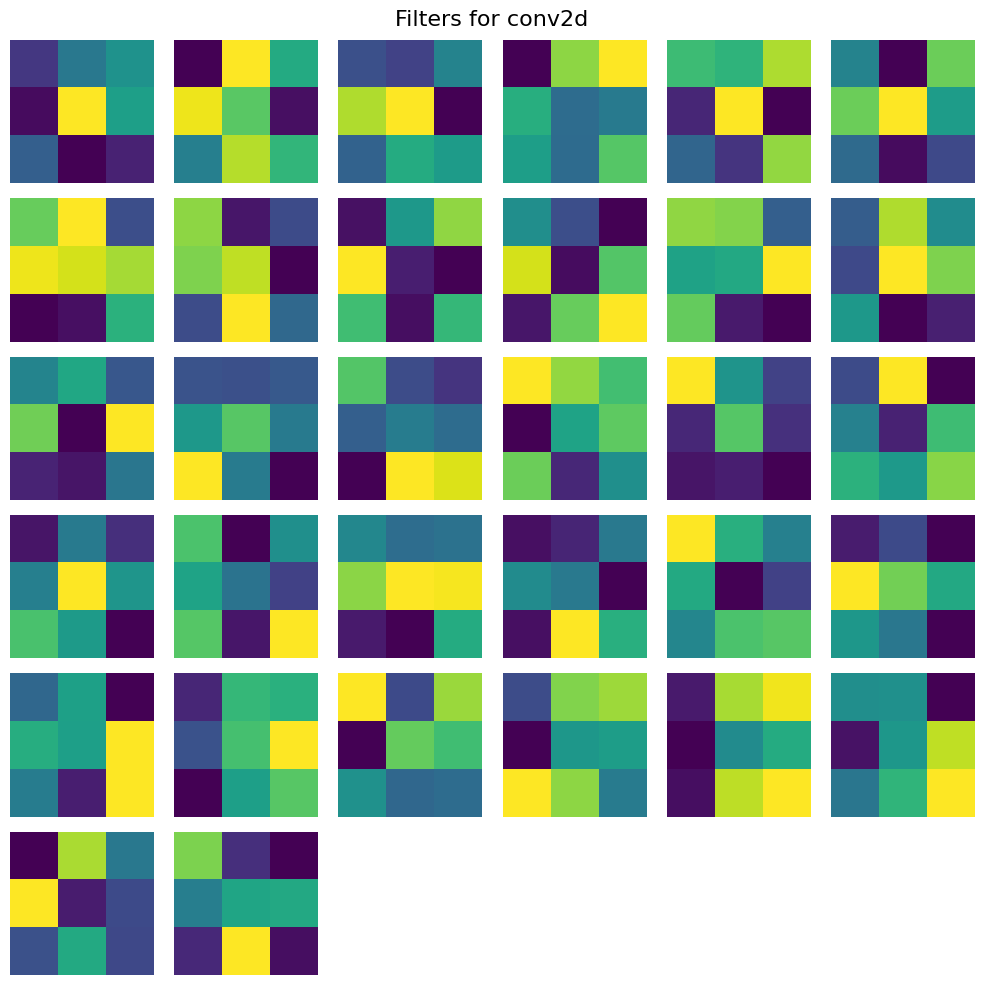

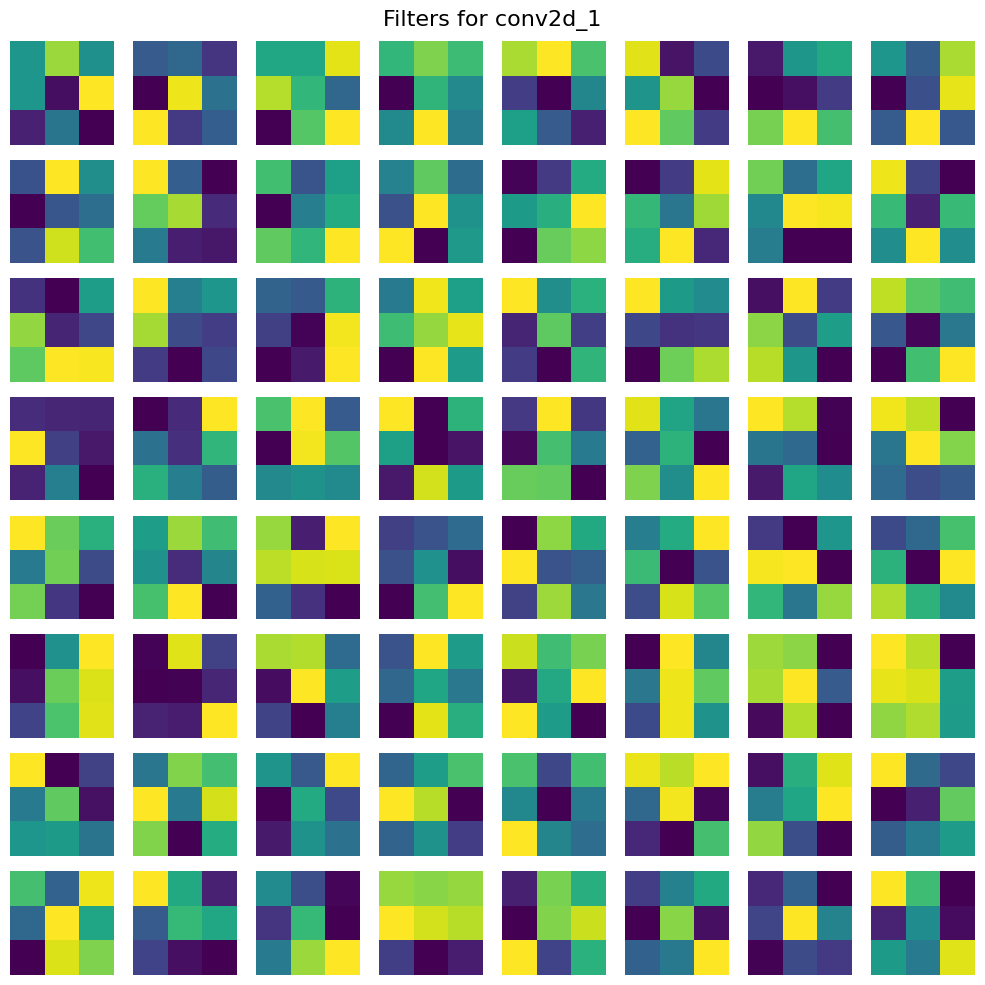

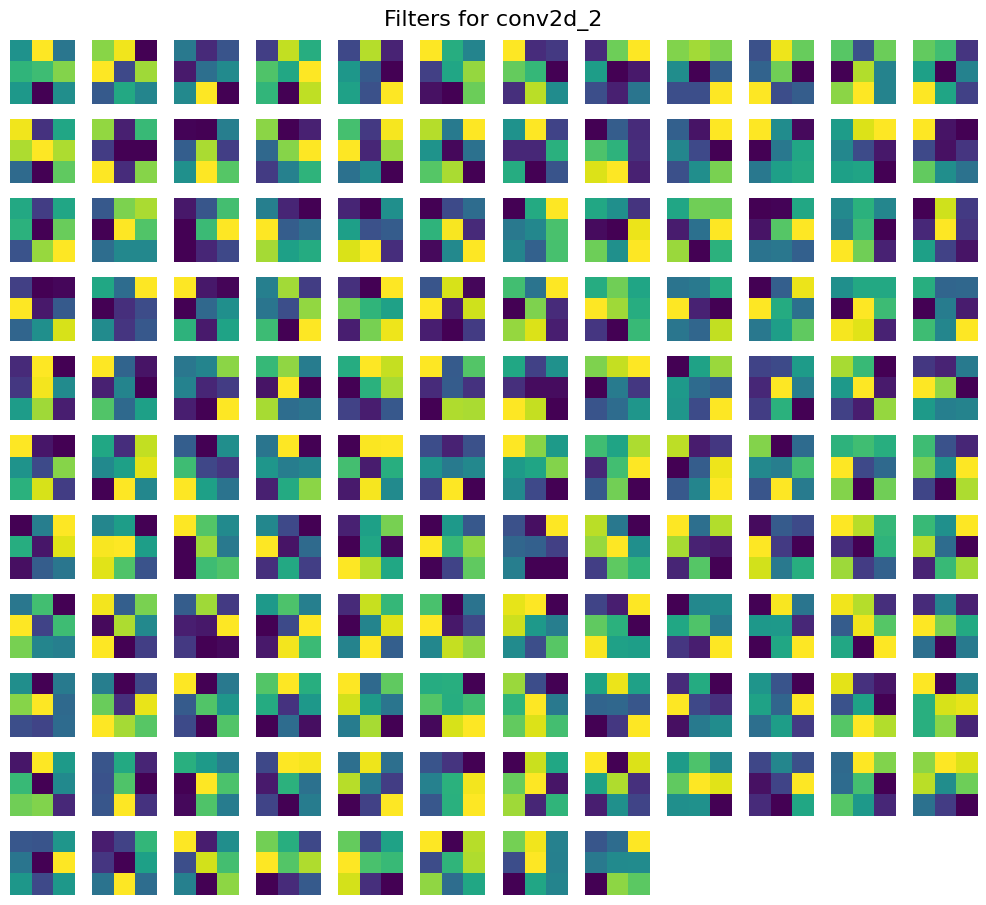

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def visualize_cnn_layers(model_path):
    # Load the model
    model = tf.keras.models.load_model(model_path)
    
    # Print model summary
    model.summary()
    
    # Visualize convolutional layer weights
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Conv2D):
            # Get layer weights
            weights = layer.get_weights()[0]  # Shape: (filter_height, filter_width, input_channels, output_channels)
            
            # Determine grid layout
            num_filters = weights.shape[-1]  # Number of output channels (filters)
            grid_size = int(np.ceil(np.sqrt(num_filters)))
            
            # Create figure
            plt.figure(figsize=(10, 10))
            plt.suptitle(f'Filters for {layer.name}', fontsize=16)
            
            # Plot each filter
            for i in range(num_filters):
                plt.subplot(grid_size, grid_size, i + 1)
                
                # Normalize the filter values to [0, 1] for visualization
                filter_img = weights[..., i]
                if filter_img.ndim == 3:  # Multi-channel filter
                    filter_img = filter_img[..., 0]  # Visualize the first channel
                
                # Normalize to [0, 1] to avoid visualization errors
                filter_img -= filter_img.min()
                if filter_img.max() > 0:
                    filter_img /= filter_img.max()
                
                plt.imshow(filter_img, cmap='viridis')
                plt.axis('off')
            
            plt.tight_layout()
            plt.show()

# Example usage
visualize_cnn_layers('solar_forecast_cnn_model.keras')